<div style="clear: both; width: 100%; overflow: auto"><img src="img/yabox.png" style="width: 250px; float: left"/></div>

> Yabox: Yet another black-box optimization library for Python - https://github.com/pablormier/yabox

Tutorial of the basic functionality of Yabox

Author: Pablo Rodríguez-Mier, [@pablormier](https://twitter.com/PabloRMier)

# Imports

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
from time import sleep
from IPython import display

# Load Yabox (from local)
# Comment this line to use the installed version
sys.path.insert(0, '../')

import yabox as yb

# Import the DE implementations
from yabox.algorithms import DE, PDE
from yabox.problems import *
print('Yabox version: ', yb.__version__)

Yabox version:  1.1.1


# Basics

Easiest way to optimize a function is to pass it as a lambda function to DE and call `solve`. For example, find the minimum of the function $f = \sum_i x_i^2 + 1$ in 5 dimensions ($x = [x_0,\dots,x_4]$), bounding the search between -10 and 10 for each $x_i$:

In [67]:
DE(lambda x: sum(x**2)+1, [(-10, 10)] * 5, maxiters=10000).solve(show_progress=True)

Optimizing (DE): 100%|██████████| 10000/10000 [00:24<00:00, 401.81it/s]


(array([[-5.46663870e-09,  3.16866533e-11, -4.74462425e-09,
         -3.03646708e-09, -3.77848508e-09]]),
 1.0)

In many scenarios, the function to optimize may depend on many other components or other fixed parameters. It is very convenient to define a function to create your optimizable function. Here is an example of this, where `create_loss` is a function that prepares the data and returns another function to be optimize:

In [68]:
def create_loss(p1, p2, p3):
    # Prepare here whatever you need. Load parameters,
    # read from file, etc
    a = p1 * p2
    b = p2 / p3
    # Define the function to be optimized as an inner function
    # that can make use of the other parameters
    def f(x):
        return 1 + a*x - b*x**2 + 0.01*x**3 + 0.001 * x**4
    return f

f = create_loss(5, 2, 0.1)
f(0)

1.0

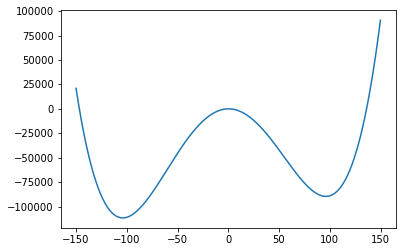

In [69]:
x = np.arange(-150, 150, 0.1)
plt.plot(x, f(x));

In [70]:
xo, yo = DE(f, [(-150, 150)], maxiters=1000).solve(show_progress=True)
xo, yo

Optimizing (DE): 100%|██████████| 1000/1000 [00:00<00:00, 1719.85it/s]


(array([[-103.94038662]]), array([-111621.93226051]))

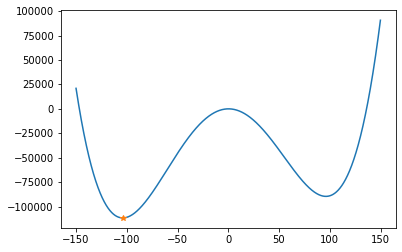

In [71]:
fig, ax = plt.subplots()
ax.plot(x, f(x));
ax.plot(xo[0][0], yo[0], '*')

You can control also the search process. Use `geniterator()` to get an iterator at the level of the population (by default, `.iterator()` returns an iterator at the level of individual (thus it iteraters maxiters * popsize  times)

[-75652.81080163] [0.87888235] [113.66470395]
[-85322.77579122] [0.8540079] [106.202369]
[-89565.54499052] [0.82255533] [96.76660049]
[-89565.54499052] [0.82255533] [96.76660049]
[-89565.54499052] [0.82255533] [96.76660049]
[-89575.80614122] [0.8197716] [95.9314799]
[-89578.33382027] [0.82052855] [96.15856584]
[-89578.33382027] [0.82052855] [96.15856584]
[-89578.37051955] [0.82061002] [96.18300596]
[-89578.37246049] [0.82062843] [96.18852753]


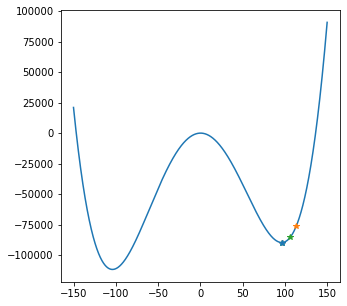

In [141]:
# Control the iteration process

de = DE(f, [(-150, 150)], maxiters=10)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f(x))
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    print(step.best_fitness, norm_vector, best_params[0])
    ax.plot(best_params[0], step.best_fitness, '*')

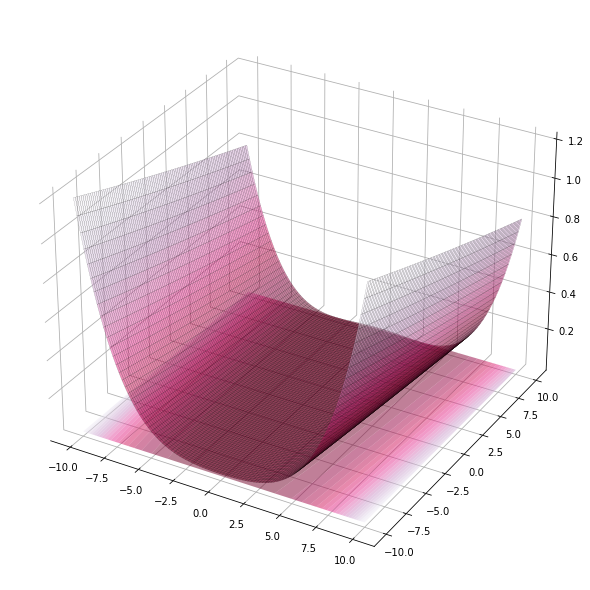

In [74]:
problem = Rosenbrock()
problem.plot3d();

0.07736098313514349 [0.53628082 0.52609822] [0.72561647 0.52196441]


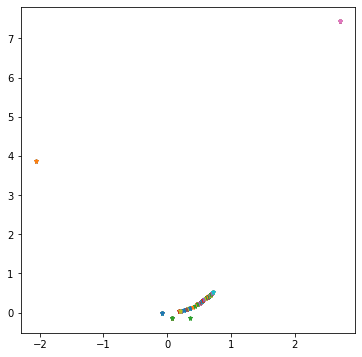

In [75]:
# ROSENBROCK FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

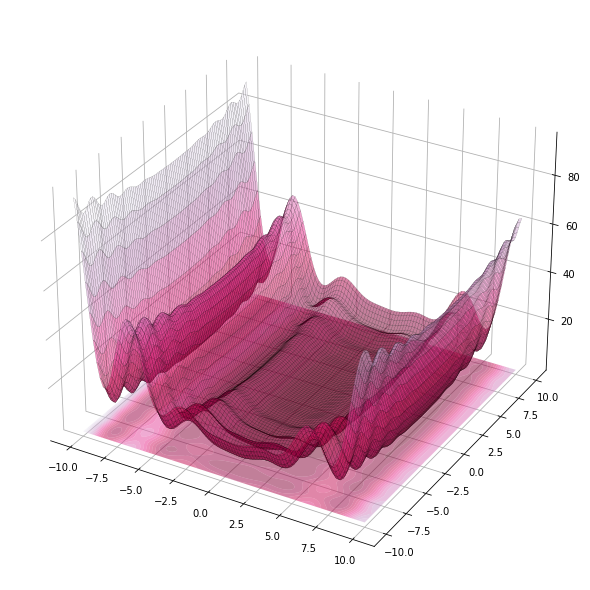

In [76]:
problem = Levy()
problem.plot3d();

2.562743745159596e-21 [0.55 0.55] [1. 1.]


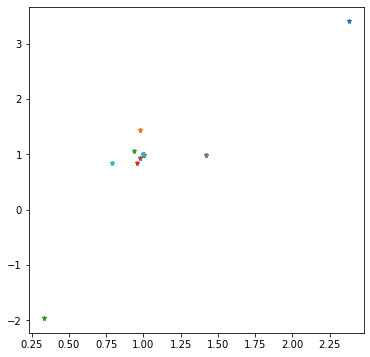

In [78]:
# LEVY FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

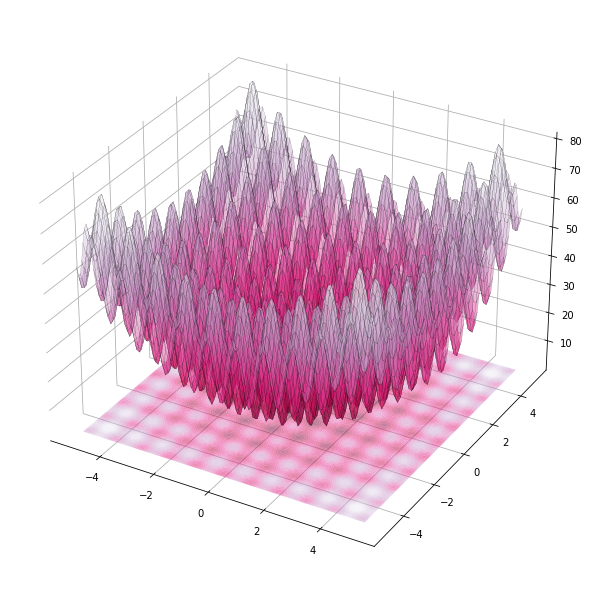

In [80]:
problem = Rastrigin()
problem.plot3d();

0.9949590570939364 [0.5        0.40283608] [ 2.69825762e-08 -9.94958587e-01]


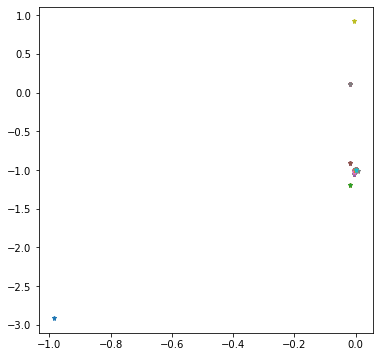

In [81]:
# RASTRIGIN FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

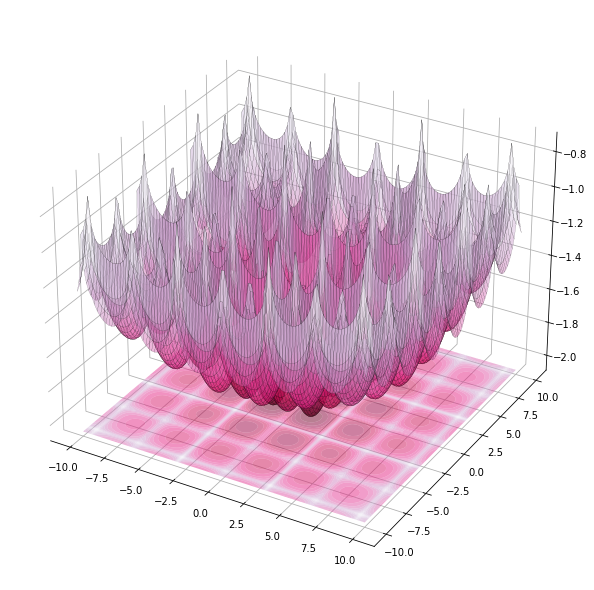

In [82]:
problem = CrossInTray()
problem.plot3d();

-2.0626118708227312 [0.56747032 0.56747033] [1.34940636 1.34940667]


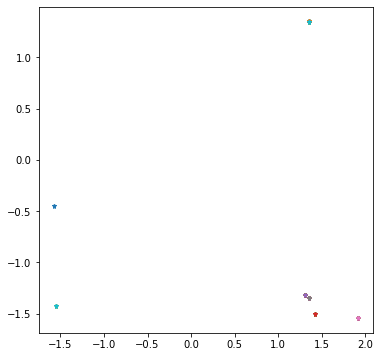

In [83]:
# CROSS-IN-TRAY FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

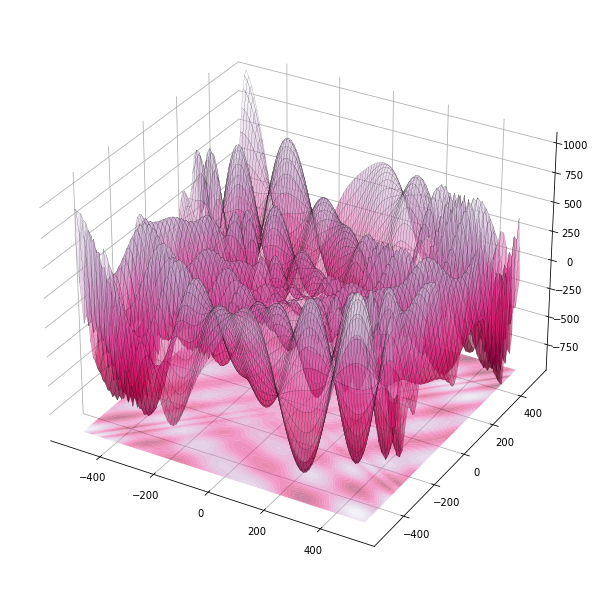

In [94]:
problem = EggHolder()
problem.plot3d();

-894.5788857861669 [0.04518802 0.87668356] [-465.72746685  385.72396157]


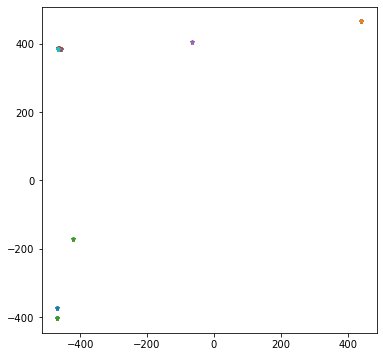

In [95]:
# EGGHOLDER FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

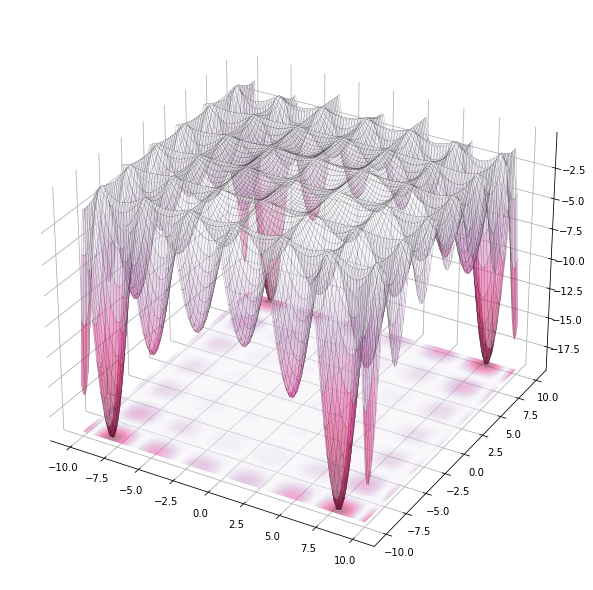

In [117]:
problem = HolderTable()
problem.plot3d();

-19.208502566989804 [0.90275122 0.01677097] [ 8.05502443 -9.66458062]


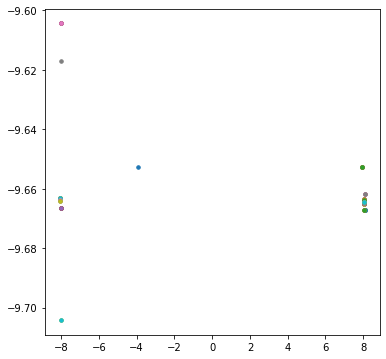

In [122]:
# HOLDER TABLE FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
best_fit_inall = np.inf
best_params_inall = []
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    if step.best_fitness <= best_fit_inall:
        best_fit_inall = step.best_fitness
        best_params_inall.append(best_params)
    ax.plot(best_params[0][0], best_params[0][1], '.', linewidth=2, markersize=7)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
    
print(step.best_fitness, norm_vector, best_params[0])
#print(np.unique(best_params_inall, axis=0))
#for best_param in np.unique(best_params_inall, axis=0):
    #print(step.best_fitness, norm_vector, best_param[0])

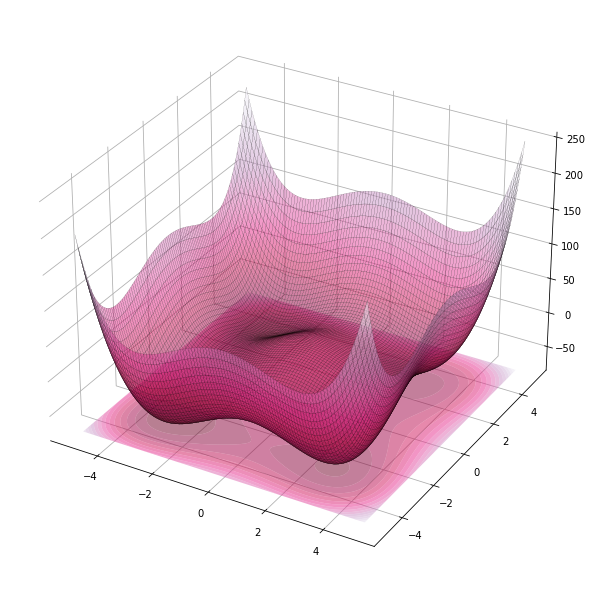

In [89]:
problem = StyblinskiTang()
problem.plot3d();

-78.33233140754285 [0.2096466 0.2096466] [-2.90353404 -2.90353402]


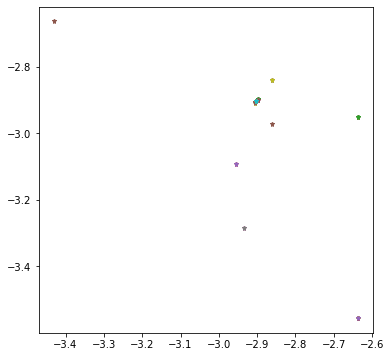

In [90]:
# STYBLINSKI-TANG FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

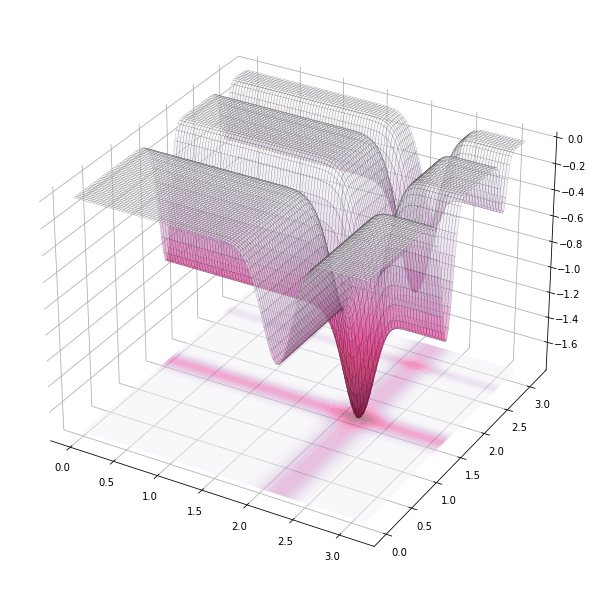

In [91]:
problem = Michalewicz()
problem.plot3d();

-1.8013034100985532 [0.70120661 0.5       ] [2.20290552 1.57079632]


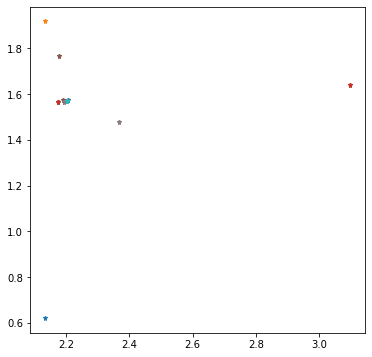

In [92]:
# MICHALEWICZ FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

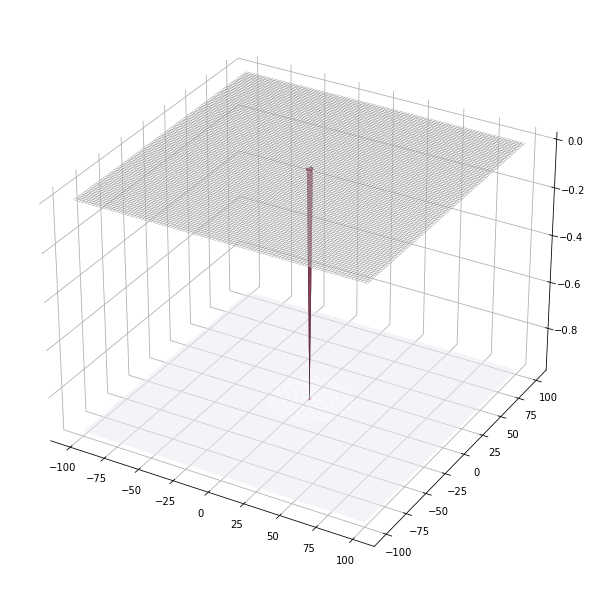

In [131]:
problem = Easom()
problem.plot3d();

-0.9999999999223619 [0.515708   0.51570798] [3.14159923 3.1415809 ]


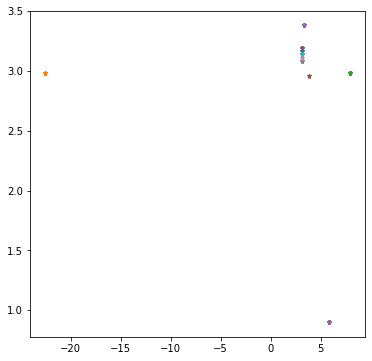

In [132]:
# EASOM FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

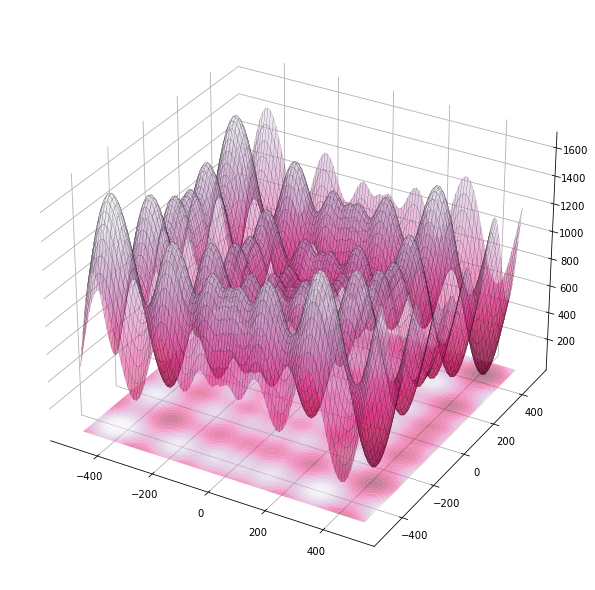

In [129]:
problem = Schwefel()
problem.plot3d();

2.5455132345086895e-05 [0.92096875 0.92096875] [420.96874601 420.96874663]


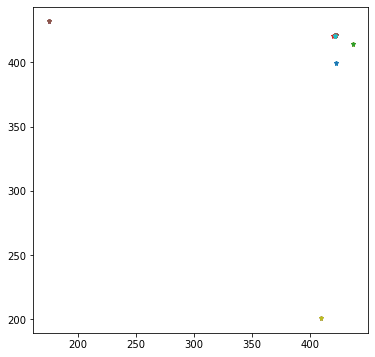

In [130]:
# SCHWEFEL FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])

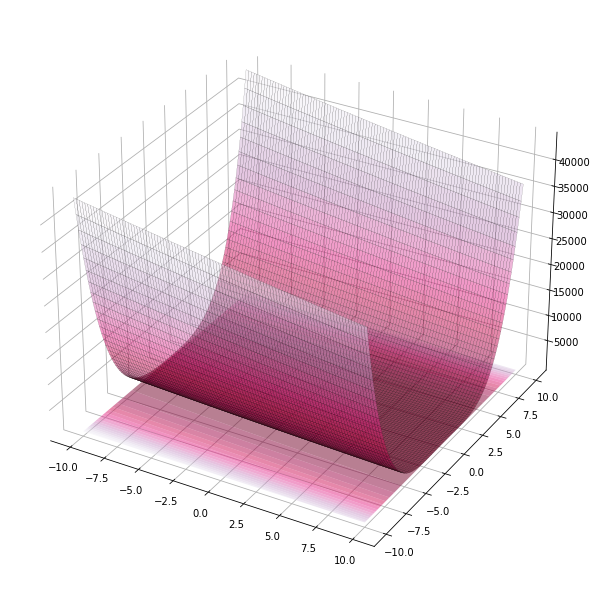

In [125]:
problem = DixonPrice()
problem.plot3d();

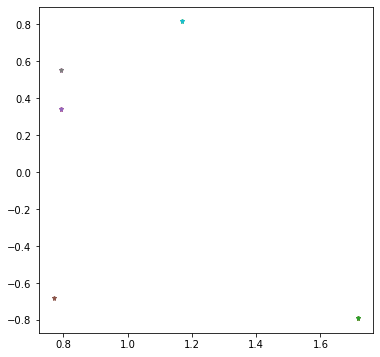

In [127]:
# DIXON-PRICE FUNCTION
de = DE(problem, problem.bounds, maxiters=10)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
# TODO Write an array to save results because the display removes
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    #print(step.best_fitness, norm_vector, best_params[0])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
#print(step.best_fitness, norm_vector, best_params[0])

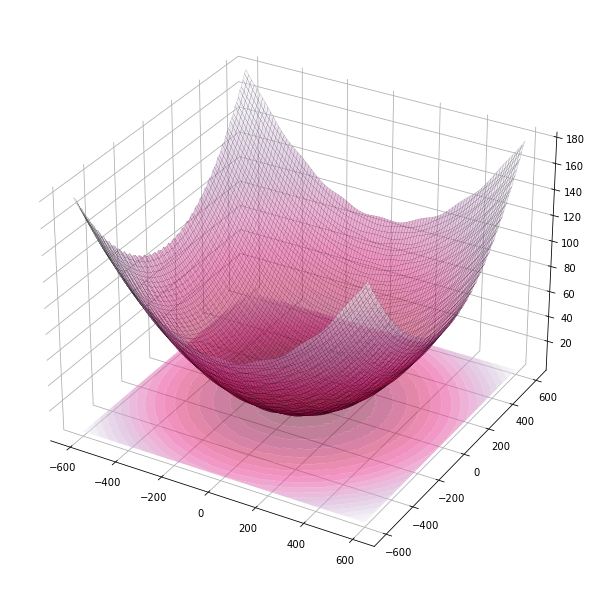

In [123]:
problem = Griewank()
problem.plot3d();

0.010139999441759029 [0.49475287 0.50001964] [-6.29655825  0.02356254]


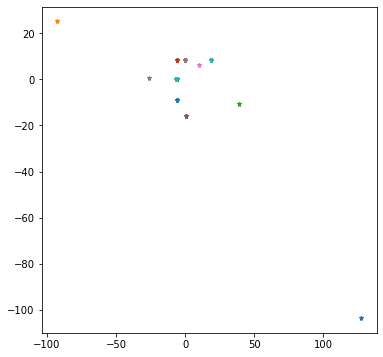

In [124]:
# GRIEWANK FUNCTION
de = DE(problem, problem.bounds, maxiters=100)
fig, ax = plt.subplots(figsize=(6,6))
#x = np.arange(-10, 10, 0.1)
for step in de.geniterator():
    idx = step.best_idx
    norm_vector = step.population[idx]
    best_params = de.denormalize([norm_vector])
    ax.plot(best_params[0][0], best_params[0][1], '*', linewidth=2, markersize=5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.1)
print(step.best_fitness, norm_vector, best_params[0])